<h1>Импорт библиотек

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [6]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    if not X:
        return np.array([])
    
    total = np.zeros_like(X[0] @ V[0])
    
    for mat, vec in zip(X, V):
        total += mat @ vec
    
    return total

class TestSumProd(unittest.TestCase):
    def test_empty_input(self):
        self.assertTrue(np.array_equal(sum_prod([], []), np.array([])))

    def test_single_element(self):
        X = [np.array([[2, 3], [1, 4]])]
        V = [np.array([[1], [2]])]
        expected = np.array([[8], [9]])
        np.testing.assert_array_equal(sum_prod(X, V), expected)

    def test_multiple_elements(self):
        X = [
            np.eye(2),  # [[1,0],[0,1]]
            np.eye(2)*2  # [[2,0],[0,2]]
        ]
        V = [
            np.array([[1], [1]]),
            np.array([[2], [2]])
        ]
        expected = np.array([[5], [5]])  # [1+4, 1+4]
        np.testing.assert_array_equal(sum_prod(X, V), expected)

    def test_zero_vectors(self):
        X = [
            np.array([[1, 2], [3, 4]]),
            np.array([[5, 6], [7, 8]])
        ]
        V = [
            np.zeros((2, 1)),
            np.zeros((2, 1))
        ]
        expected = np.zeros((2, 1))
        np.testing.assert_array_equal(sum_prod(X, V), expected)

    def test_dimension_mismatch(self):
        X = [np.ones((3, 3))]
        V = [np.ones((2, 1))]
        with self.assertRaises(ValueError):
            sum_prod(X, V)

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestSumProd))

.....
----------------------------------------------------------------------
Ran 5 tests in 0.034s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [9]:
def binarize(M, threshold=0.5):
    return (np.array(M) > threshold).astype(int)

class TestBinarize(unittest.TestCase):
    def test_binarize_with_default_threshold(self):
        M = [[0.1, 0.5, 0.7], 
             [0.4, 0.6, 0.9], 
             [0.2, 0.3, 0.8]]
        expected = [[0, 0, 1], 
                    [0, 1, 1], 
                    [0, 0, 1]]
        np.testing.assert_array_equal(binarize(M), expected)

    def test_binarize_with_custom_threshold(self):
        M = [[0.1, 0.5, 0.7], 
             [0.4, 0.6, 0.9], 
             [0.2, 0.3, 0.8]]
        expected = [[0, 1, 1], 
                    [0, 1, 1], 
                    [0, 0, 1]]
        np.testing.assert_array_equal(binarize(M, threshold=0.4), expected)

    def test_empty_matrix(self):
        M = []
        expected = []
        np.testing.assert_array_equal(binarize(M), expected)

    def test_matrix_with_all_zeros(self):
        M = [[0, 0, 0], 
             [0, 0, 0], 
             [0, 0, 0]]
        expected = [[0, 0, 0], 
                    [0, 0, 0], 
                    [0, 0, 0]]
        np.testing.assert_array_equal(binarize(M), expected)

    def test_matrix_with_all_ones(self):
        M = [[1, 1, 1], 
             [1, 1, 1], 
             [1, 1, 1]]
        expected = [[1, 1, 1], 
                    [1, 1, 1], 
                    [1, 1, 1]]
        np.testing.assert_array_equal(binarize(M), expected)

    def test_mixed_values(self):
        M = [[0.1, 1.2], 
             [0.5, 0.5]]
        expected = [[0, 1], 
                    [0, 0]]
        np.testing.assert_array_equal(binarize(M, threshold=0.6), expected)

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestBinarize))

......
----------------------------------------------------------------------
Ran 6 tests in 0.003s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [12]:
def unique_rows(mat):
    return [np.unique(row).tolist() for row in np.array(mat)]

def unique_columns(mat):
    return [np.unique(col).tolist() for col in np.array(mat).T]

class TestUniqueFunctions(unittest.TestCase):
    def test_unique_rows(self):
        mat = [[1, 2, 2], 
               [3, 1, 3], 
               [4, 4, 4]]
        expected = [[1, 2], 
                    [1, 3], 
                    [4]]
        result = unique_rows(mat)
        self.assertEqual(result, expected)

    def test_unique_columns(self):
        mat = [[1, 2, 2], 
               [3, 1, 3], 
               [4, 4, 4]]
        expected = [[1, 3, 4], 
                    [1, 2, 4],
                    [2, 3, 4]]
        result = unique_columns(mat)
        self.assertEqual(result, expected)

    def test_empty_matrix(self):
        mat = []
        expected_rows = []
        expected_columns = []
        self.assertEqual(unique_rows(mat), expected_rows)
        self.assertEqual(unique_columns(mat), expected_columns)

    def test_matrix_with_single_row(self):
        mat = [[1, 2, 2, 3]]
        expected_rows = [[1, 2, 3]]
        expected_columns = [[1], [2], [2], [3]]
        self.assertEqual(unique_rows(mat), expected_rows)
        self.assertEqual(unique_columns(mat), expected_columns)

    def test_matrix_with_single_column(self):
        mat = [[1], 
               [2], 
               [1]]
        expected_rows = [[1], [2], [1]]
        expected_columns = [[1, 2]]
        self.assertEqual(unique_rows(mat), expected_rows)
        self.assertEqual(unique_columns(mat), expected_columns)

    def test_matrix_with_all_unique_elements(self):
        mat = [[1, 2], 
               [3, 4], 
               [5, 6]]
        expected_rows = [[1, 2], 
                         [3, 4], 
                         [5, 6]]
        expected_columns = [[1, 3, 5], 
                            [2, 4, 6]]
        self.assertEqual(unique_rows(mat), expected_rows)
        self.assertEqual(unique_columns(mat), expected_columns)

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestUniqueFunctions))


......
----------------------------------------------------------------------
Ran 6 tests in 0.002s

OK


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Строки - математическое ожидание: [-0.76404698 -0.04504833  0.39738544 -0.68657469  0.32188042]
Строки - дисперсия: [0.30266078 0.88149741 0.51331489 0.75259954 0.58385029]
Столбцы - математическое ожидание: [-0.17709581 -0.59204879  0.34736875 -0.19934745]
Столбцы - дисперсия: [0.85063865 0.21313844 1.17958242 0.69645298]


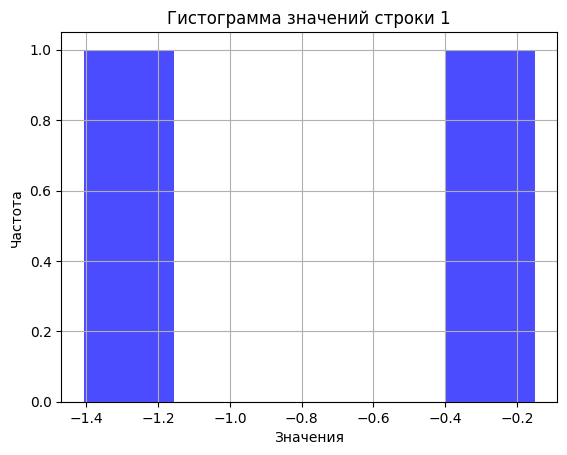

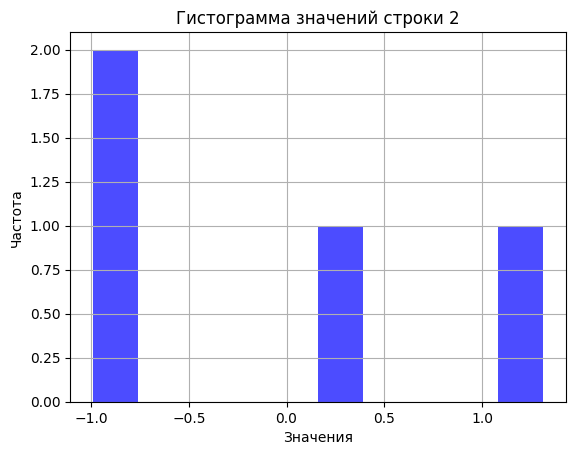

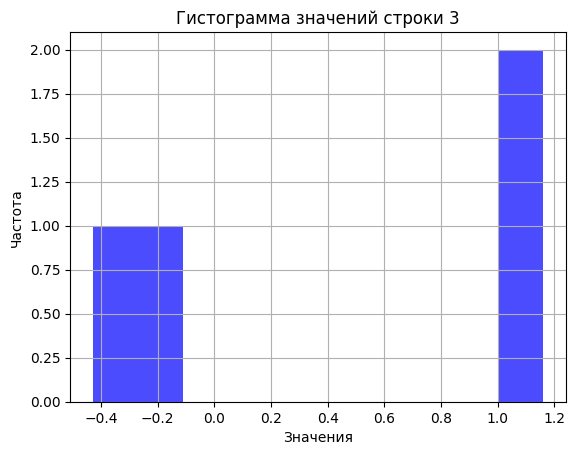

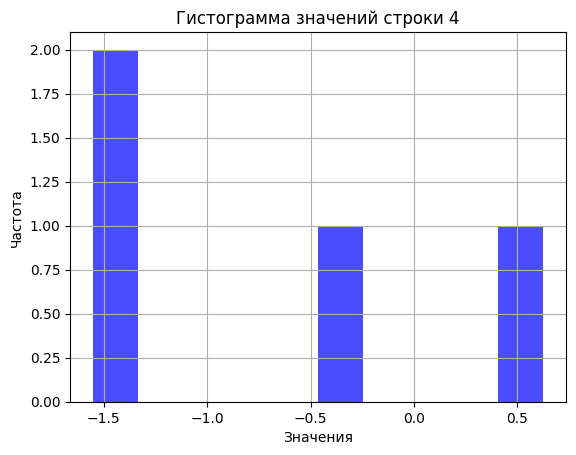

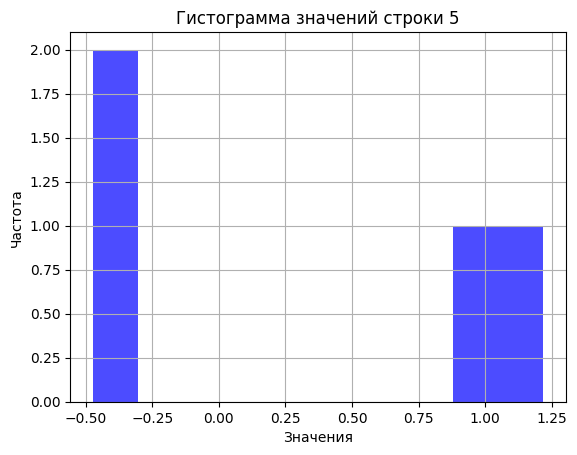

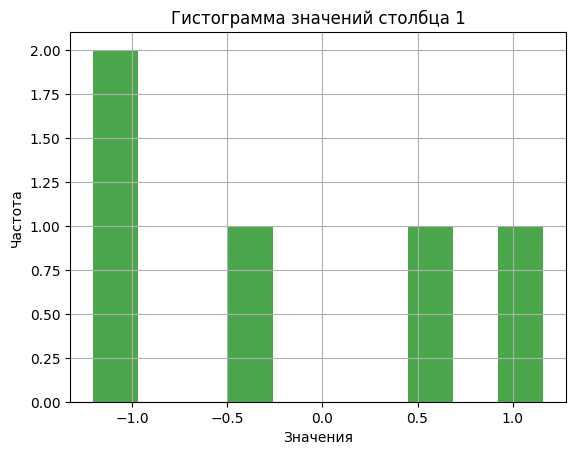

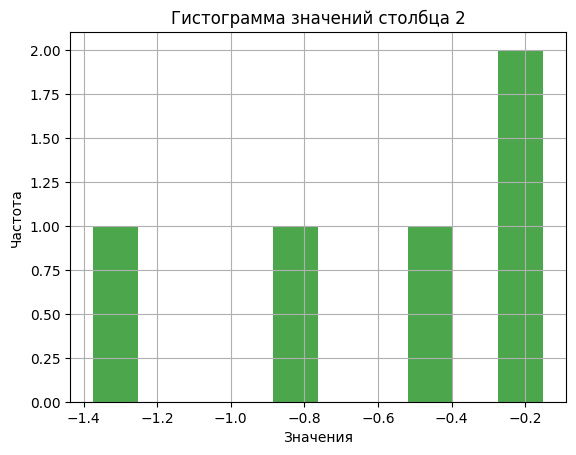

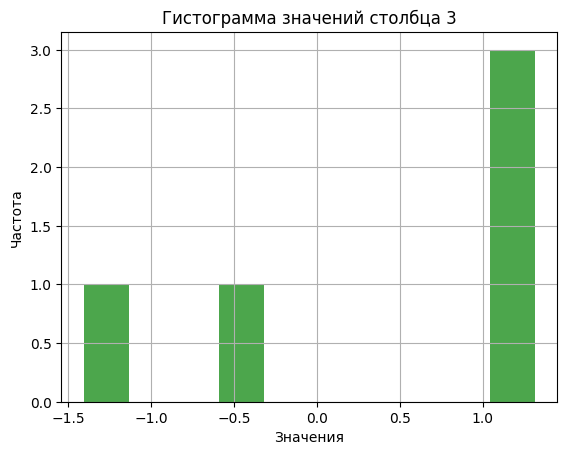

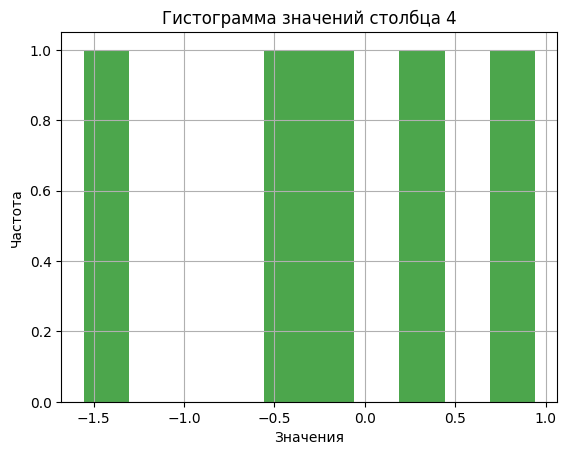

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def fill_matrix_and_analyze(m, n):
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))
    
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    print("Строки - математическое ожидание:", row_means)
    print("Строки - дисперсия:", row_variances)
    print("Столбцы - математическое ожидание:", col_means)
    print("Столбцы - дисперсия:", col_variances)

    for i in range(m):
        plt.figure()
        plt.hist(matrix[i], bins=10, alpha=0.7, color='blue')
        plt.title(f'Гистограмма значений строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green')
        plt.title(f'Гистограмма значений столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()

fill_matrix_and_analyze(5, 4)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [15]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)

    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b

    return matrix

class TestChessFunction(unittest.TestCase):
    def test_2x2(self):
        result = chess(2, 2, 1, 0)
        expected = np.array([[1, 0], [0, 1]])
        np.testing.assert_array_equal(result, expected)

    def test_3x3(self):
        result = chess(3, 3, 1, 0)
        expected = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
        np.testing.assert_array_equal(result, expected)

    def test_3x4(self):
        result = chess(3, 4, 2, 3)
        expected = np.array([[2, 3, 2, 3], [3, 2, 3, 2], [2, 3, 2, 3]])
        np.testing.assert_array_equal(result, expected)

    def test_4x4(self):
        result = chess(4, 4, 5, 10)
        expected = np.array([[5, 10, 5, 10], [10, 5, 10, 5], [5, 10, 5, 10], [10, 5, 10, 5]])
        np.testing.assert_array_equal(result, expected)

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestChessFunction))

....
----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [16]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color

    image[0:a, 0:b] = rectangle_color

    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color

    y, x = np.ogrid[:m, :n]
    y0, x0 = m // 2, n // 2

    mask = ((x - x0) ** 2) / (a ** 2) + ((y - y0) ** 2) / (b ** 2) <= 1
    image[mask] = ellipse_color

    return image

class TestShapesFunction(unittest.TestCase):
    def test_draw_rectangle(self):
        result = draw_rectangle(100, 200, 300, 400, (255, 0, 0), (0, 255, 0))  # Красный на зеленом фоне
        self.assertEqual(result[50, 100].tolist(), [255, 0, 0])  # Проверка внутри прямоугольника
        self.assertEqual(result[150, 300].tolist(), [0, 255, 0])  # Проверка вне прямоугольника

    def test_draw_ellipse(self):
        result = draw_ellipse(100, 50, 300, 400, (0, 0, 255), (255, 255, 255))  # Синий на белом фоне
        self.assertEqual(result[150, 200].tolist(), [0, 0, 255])  # Проверка внутри овала
        self.assertEqual(result[250, 300].tolist(), [255, 255, 255])  # Проверка вне овала

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestShapesFunction))

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [17]:
def calculate_statistics(time_series):
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_dev = np.std(time_series)
    return mean, variance, std_dev

def find_local_extremes(time_series):
    local_maxima = []
    local_minima = []
    
    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_maxima.append(i)
        elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_minima.append(i)
    
    return local_maxima, local_minima

def moving_average(time_series, p):
    if p < 1:
        raise ValueError("Размер окна p должен быть больше 0")
    return np.convolve(time_series, np.ones(p)/p, mode='valid')

time_series = [1, 3, 2, 5, 4, 6, 4, 2, 3, 5, 4]

mean, variance, std_dev = calculate_statistics(time_series)
print(f'Математическое ожидание: {mean}')
print(f'Дисперсия: {variance}')
print(f'СКО: {std_dev}')

local_maxima, local_minima = find_local_extremes(time_series)
print(f'Локальные максимумы: {local_maxima}')
print(f'Локальные минимумы: {local_minima}')

p = 3
moving_avg = moving_average(time_series, p)
print(f'Скользящее среднее (p={p}): {moving_avg}')


Математическое ожидание: 3.5454545454545454
Дисперсия: 2.0661157024793386
СКО: 1.4373989364401722
Локальные максимумы: [1, 3, 5, 9]
Локальные минимумы: [2, 4, 7]
Скользящее среднее (p=3): [2.         3.33333333 3.66666667 5.         4.66666667 4.
 3.         3.33333333 4.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [18]:
def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    one_hot_vectors = np.zeros((len(labels), num_classes), dtype=int)
    
    for idx, label in enumerate(labels):
        one_hot_vectors[idx, label] = 1
    
    return one_hot_vectors

labels = [0, 2, 3, 0]
one_hot_encoded = one_hot_encoding(labels)
print("One-hot encoding:")
print(one_hot_encoded)

One-hot encoding:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
